In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("resources/titanic_train.csv", parse_dates=True)

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Deleting columns we don't need
- passangerid
- name
- ticket

In [4]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

## Missing data
- too many values missint for cabin so lets drop

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
df.drop("Cabin", axis=1, inplace=True)

## Replacing missing age
- lets try to replace the age with the average per class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

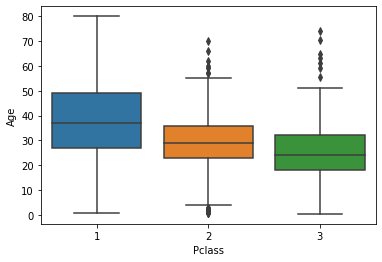

In [7]:
sns.boxplot(x = df["Pclass"], y= df["Age"])

In [8]:
def replaceAge(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 27
    else:
        return age

### Applying age replace func

In [9]:
df['Age'] = df[["Age","Pclass"]].apply(replaceAge, axis=1)

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

# Dropping Embarked
- Will remove the two missing rows 

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Converting String Values

In [13]:
df["Sex"] = pd.get_dummies(df["Sex"], drop_first=True)

<ipython-input-13-719bc200fdad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"] = pd.get_dummies(df["Sex"], drop_first=True)


In [14]:
df["Embarked"].nunique()

3

In [15]:
embarked = pd.get_dummies(df["Embarked"], drop_first=True)

In [16]:
df = pd.concat([df, embarked], axis=1)

In [17]:
df.drop("Embarked", axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    uint8  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


## Setting data for up model 
- Survived will be our target 

In [19]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

## Training testing and splitting

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 486 to 103
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  622 non-null    int64  
 1   Sex     622 non-null    uint8  
 2   Age     622 non-null    float64
 3   SibSp   622 non-null    int64  
 4   Parch   622 non-null    int64  
 5   Fare    622 non-null    float64
 6   Q       622 non-null    uint8  
 7   S       622 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 31.0 KB


In [23]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 281 to 430
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  267 non-null    int64  
 1   Sex     267 non-null    uint8  
 2   Age     267 non-null    float64
 3   SibSp   267 non-null    int64  
 4   Parch   267 non-null    int64  
 5   Fare    267 non-null    float64
 6   Q       267 non-null    uint8  
 7   S       267 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 13.3 KB


## Creating model

In [24]:
from sklearn.linear_model import LogisticRegression

In [42]:
log = LogisticRegression(max_iter=500)

In [43]:
model  = log.fit(X_train, y_train)

In [44]:
model.intercept_

array([5.65840171])

## Predicitons

In [45]:
predicitons = model.predict(X_test)

In [46]:
predicitons

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1])

## Metrics

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

In [48]:
print(confusion_matrix(predicitons, y_test))

[[138  25]
 [ 29  75]]


In [49]:
print(classification_report(predicitons, y_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       163
           1       0.75      0.72      0.74       104

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



In [50]:
print(explained_variance_score(predicitons, y_test))

0.15042472864558754


### Testing on random passangers 

In [51]:
from random import randint
random_index = randint(0, len(X_test))
random_passanger = X_test.iloc[random_index]

In [52]:
random_passanger

Pclass     2.0
Sex        0.0
Age       35.0
SibSp      0.0
Parch      0.0
Fare      21.0
Q          0.0
S          1.0
Name: 211, dtype: float64

## Random Passanger Prediction

In [53]:
X_test.values.shape

(267, 8)

In [54]:
random_passanger.values.shape

(8,)

In [55]:
random_passanger = random_passanger.values.reshape(1,8)

In [56]:
random_passanger

array([[ 2.,  0., 35.,  0.,  0., 21.,  0.,  1.]])

#### Random Prediction Result

In [57]:
model.predict(random_passanger)

array([1])

## True Value

In [58]:
y_test.iloc[random_index]

1